In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(0)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    max_tokens=5000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


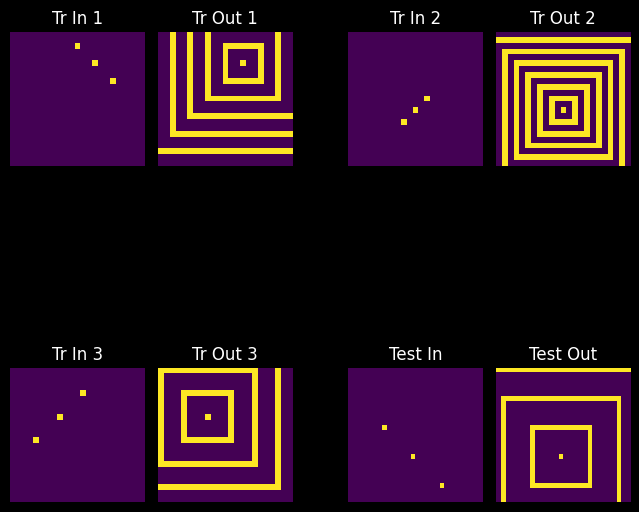

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLUFocus,MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer betwe
                    en 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.5.trail1",#"knowledge_base_v-0.4-focus.trail1",
    compress_knowledge=False,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/100 [00:00<?, ?it/s]Delete of nonexisting embedding ID: fce9b35a-63b5-40d3-b6ae-e057cf0ac30f
Delete of nonexisting embedding ID: bbce00cb-537c-4f13-92f4-4fa618bddc3d
Delete of nonexisting embedding ID: 5a0b84d3-2f94-4c00-a139-497b89786a13
Delete of nonexisting embedding ID: 1e9c8831-1b74-4aec-8adf-6059677efb4f
Delete of nonexisting embedding ID: 6df662e1-248f-404f-acaa-ddf7b50f8c03
Delete of nonexisting embedding ID: 5a992fc0-9bea-45d1-8efa-88addf4dbd76
Delete of nonexisting embedding ID: 9153250f-a665-4be9-af70-d82dc36254f0
Delete of nonexisting embedding ID: ceb69168-23ce-4af0-93ae-b6bbc2f0476f
Delete of nonexisting embedding ID: ee3298ef-bcc1-4c16-a7d7-21888fc5714e
Delete of nonexisting embedding ID: 2a587188-de20-45fe-9291-5bb59e6b01ad
Delete of nonexisting embedding ID: 66954e5f-45a9-457c-ba11-6139663cac3c
Delete of nonexisting embedding ID: 14c11f35-4561-4720-8acd-a42a7d7ffca3
Delete of nonexisting embedding ID: 3c27880e-1df0-4f82-829d-3e62a2b81317
De

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Pruned 14 old entries and added 1 new entries.


Delete of nonexisting embedding ID: 217f8635-5621-4bf1-a091-e1cceb7faa97
Delete of nonexisting embedding ID: c8699e4f-15ec-45e0-9479-2cdc9f77ef39
Delete of nonexisting embedding ID: fc0481d7-3144-4adf-83b2-15b5645aac54
Delete of nonexisting embedding ID: 1a1b7d2e-c414-45e1-be43-a48bf8b94fa9
Delete of nonexisting embedding ID: feb5fe05-1ddf-43d7-8b7f-2e48145abfa2
Delete of nonexisting embedding ID: 79c5d4bb-b22b-4951-8382-bd531df0d707
Delete of nonexisting embedding ID: 4e081e7c-5a8a-4275-92df-4a631a537082
Delete of nonexisting embedding ID: 8067da79-ef02-4480-9fe4-b448714f7636
Delete of nonexisting embedding ID: 73c2c950-3414-48bb-94b7-497fd0e1c0ef
Delete of nonexisting embedding ID: 45ba34e3-15f1-44b9-a5c5-6a09ff753f1a
Delete of nonexisting embedding ID: 6660415c-985d-48e5-b375-f00d5160cab3
Delete of nonexisting embedding ID: 1f2f87b4-c449-4a01-91a2-07222fb025e4
Delete of nonexisting embedding ID: 8409484b-48be-431b-8744-1292759eb2fd
Delete of nonexisting embedding ID: bf95f1fc-7ab4-4

Pruned 14 old entries and added 5 new entries.

Learned Knowledge Update:
['Symmetrical Transformation Patterns: The output grid must maintain symmetry '
 "in its arrangement, mirroring the input grid's key features and reflecting "
 'their structural balance. Applicability: Transformations from input to '
 'output grids where symmetry is crucial in preserving visual coherence.',
 'Clustering of Significant Integers: Critical integers should be clustered '
 'around their respective centers to visually and contextually relate them to '
 'their original positions in the input grid. Applicability: Scenarios where '
 'important integers are emphasized within processed matrices for clarity and '
 'significance.',
 'Iterative Refinement Process: Outputs should be generated and refined '
 'through multiple trials, utilizing feedback from each iteration to adjust '
 'placements and structures. Applicability: Any tasks that involve multiple '
 'attempts of transforming input images into output 

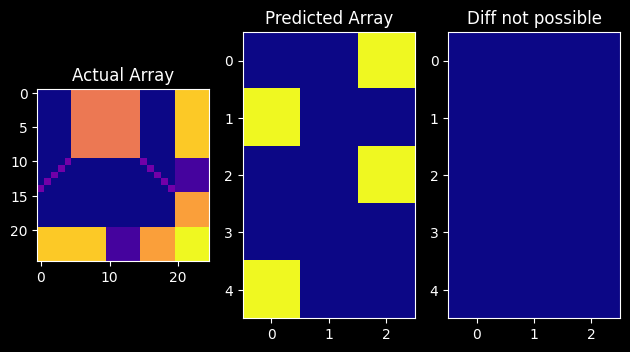

Training:   1%|          | 1/100 [04:05<6:45:04, 245.50s/it]Number of requested results 15 is greater than number of elements in index 12, updating n_results = 12
Number of requested results 15 is greater than number of elements in index 12, updating n_results = 12


Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Pruned 12 old entries and added 10 new entries.


Delete of nonexisting embedding ID: 2adc83e8-8ec5-4c75-bafd-1ea24d23b744
Delete of nonexisting embedding ID: 84c5ba23-40c4-40e8-8f9a-d89af48406df
Delete of nonexisting embedding ID: f81b0246-b2e5-4205-bff8-b1bb6caf99e5
Delete of nonexisting embedding ID: 6c4cdf15-eb2a-4979-920f-c038cc2e729a
Delete of nonexisting embedding ID: da21ef3e-a129-4185-90d0-e23bfe66068c
Delete of nonexisting embedding ID: a71b2d75-a7c6-4040-b2f4-17a3f4841673
Delete of nonexisting embedding ID: ec42bf56-be5e-403f-b12f-3b2c5fc51c88
Delete of nonexisting embedding ID: 07031d2c-19aa-41e0-a2ea-79e8f8e54d5c
Delete of nonexisting embedding ID: fd5bfcd7-b4ae-439b-ab0e-3fea013b8f12
Delete of nonexisting embedding ID: a2d01cf4-81af-4d2f-af9e-df45ff4fb46e
Delete of nonexisting embedding ID: 7221cc49-cc6e-4c46-83d1-07603b81468c
Delete of nonexisting embedding ID: 7ed97a16-4afe-439e-805d-3385150de8fc
Delete of nonexisting embedding ID: 2adc83e8-8ec5-4c75-bafd-1ea24d23b744
Delete of nonexisting embedding ID: 84c5ba23-40c4-4

Pruned 12 old entries and added 4 new entries.

Learned Knowledge Update:
['Concept: Transformation patterns involve maintaining symmetry and clustering '
 'of integers as observed in input grids; applicable when creating output '
 'grids to ensure visual coherence.',
 'Idea: Implement systematic trials for input-output transformation to refine '
 'results through each iteration; applicable in any context where high '
 'accuracy is required.',
 'Principle: Contextual integrity must be preserved during transformations, '
 'ensuring that the relationships among integers in input grids are reflected '
 'in their output forms; relevant in all image processing tasks.',
 'Rule: Ensure the output grid dimensions correspond directly to input grid '
 'dimensions to uphold proportionality during transformation; applicable to '
 'all matrix transformation tasks.',
 'Concept: Identifying significant integers and their clusters to create '
 'centers for visual representation will greatly enhance ou

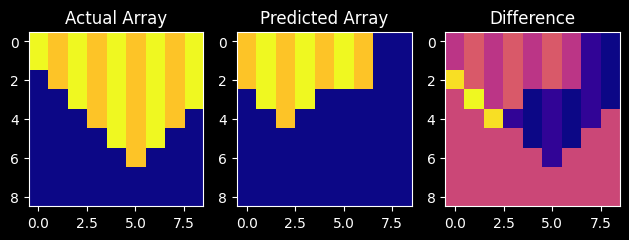

Training:   2%|▏         | 2/100 [09:16<7:43:44, 283.93s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Iteration: 3 - Pattern Extraction
Iteration: 3 - Transformation Analysis
Iteration: 3 - Logical Inference
Iteration: 3 - Solution Synthesis
Iteration: 3 - Consistency Validation
Iteration: 4 - Pattern Extraction
Iteration: 4 - Transformation Analysis
Iteration: 4 - Logical Inference
Iteration: 4 - Solution Synthesis
Iteration: 4 - Consistency Validation
Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 57189d12-019a-4d3f-9172-6c564aeb74ac
Delete of nonexisting embedding ID: b471c7f4-1d15-455a-b2fa-55d388258123
Delete of nonexisting embedding ID: 5665285d-5c25-4635-a098-a45b09f2441c
Delete of nonexisting embedding ID: 4ed36d4d-9112-4c06-b179-dab9a853d84e
Delete of nonexisting embedding ID: 50d4e737-afc4-4ff5-9d57-dd3b34e086d7
Delete of nonexisting embedding ID: 9d555e31-1179-44f7-9127-ee91728bb208
Delete of nonexisting embedding ID: a99e24d6-8187-4f52-b1c6-7dc4d65c510a
Delete of nonexisting embedding ID: e658ca36-3279-46e9-9541-1b2e62511b77
Delete of nonexisting embedding ID: 2f3608fe-11be-4655-bbef-caf53458b7bf
Delete of nonexisting embedding ID: a5257101-9811-4caf-b56b-4b0b303d4dc6
Delete of nonexisting embedding ID: efa1d617-9b6e-4e24-ac8c-216f7d04be17
Delete of nonexisting embedding ID: f458c639-a3d0-4991-83d2-97b1436f2188
Delete of nonexisting embedding ID: 9bf05f1d-a6c5-48fe-a5be-f1c8d3cd1403
Delete of nonexisting embedding ID: 180072d1-bd97-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Principle of Clustering and Proximity in Transformation: The significant '
 'integers within input grids should be grouped or clustered together in '
 'output grids to preserve contextual meaning and enhance visual '
 'representation of the data. Applicability: This principle applies to all '
 'transformation tasks involving matrices to highlight critical data points '
 'effectively.',
 'Rule of Dimensional Homogeneity: The output grid dimensions must conform '
 'strictly to the input grid dimensions unless a resizing modification is '
 'necessary. Applicability: This rule is critical to any image transformation '
 'task where spatial integrity is paramount to preserving relationships '
 'between elements.',
 'Symmetry Rule: Maintain symmetry in the transformation process to echo the '
 'inherent symmetrical patterns found in input grids. This consistency '
 'strengthens the visual coherence of the output mesh.

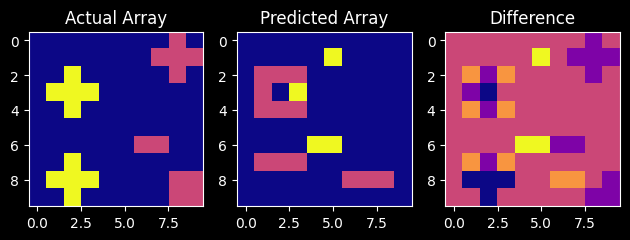

Training:   3%|▎         | 3/100 [16:29<9:29:27, 352.24s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Pruned 15 old entries and added 1 new entries.


Delete of nonexisting embedding ID: 692bf72f-4d53-454e-a45b-b1404963dfc8
Delete of nonexisting embedding ID: 7e8037d1-620c-4bb6-942f-76870ce391bf
Delete of nonexisting embedding ID: d334a4f4-548f-4fd6-b6af-0ec4996d2466
Delete of nonexisting embedding ID: 9ce7fa4e-591e-401d-a37f-4ede2cdbe8ff
Delete of nonexisting embedding ID: 1c76719d-58d2-44db-bf10-f85fc7677857
Delete of nonexisting embedding ID: 95b2c291-be14-446e-973d-6f0fa8cab8a1
Delete of nonexisting embedding ID: 80b5e7bc-c12e-43d8-ad94-f6725b22e808
Delete of nonexisting embedding ID: 89d15bc3-28e7-4e97-a5e2-75ea599d11da
Delete of nonexisting embedding ID: 4b345228-82ba-4b49-8877-10b2b153c043
Delete of nonexisting embedding ID: d17c3651-f378-439d-bc42-3b647d626beb
Delete of nonexisting embedding ID: e6673cea-698b-4538-af09-d2b79817f12f
Delete of nonexisting embedding ID: c6a8441e-5be4-4044-98ba-caf75c40d35e
Delete of nonexisting embedding ID: bfc21ba7-3e4a-4586-93a8-19c0db071f0f
Delete of nonexisting embedding ID: 692bf72f-4d53-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Concepts: Importance of adhering to spatial relationships in grid '
 'transformations to ensure contextual relevance and accuracy in outputs. '
 'Applicable in all image processing tasks.',
 'Ideas: Implementation of a systematic approach for identifying and '
 'incorporating all relevant integers during transformations to enhance output '
 'integrity. Relevant in matrix manipulations and any form of data '
 'representation.',
 'Principles: The Rule of Dimensional Homogeneity necessitates that output '
 'grids maintain the same dimensions as input grids unless resizing is '
 'necessary. Critical for maintaining structural integrity.',
 'Rules: Establish a clear iterative feedback loop after each trial in '
 'transformations for ongoing improvement, useful in all iterative learning '
 'tasks, particularly in complex data manipulations.',
 'Concepts: Understanding the principle of clustering, where significant '


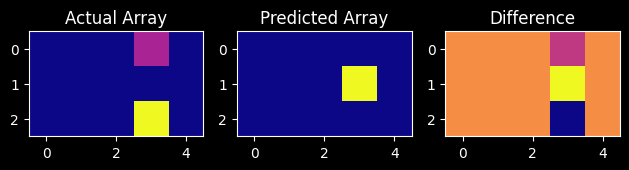

Training:   4%|▍         | 4/100 [21:38<8:55:52, 334.92s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 6dbd3d0c-4152-4d60-9e0d-0182069546de
Delete of nonexisting embedding ID: a07f1ab6-ea90-4721-bf32-ebd80bbb8fb3
Delete of nonexisting embedding ID: fcd85da3-ec99-4ed5-8502-6129e8e07eee
Delete of nonexisting embedding ID: 806d4b55-9b5a-49a8-b3bd-503b3fbb3d0b
Delete of nonexisting embedding ID: 48f393a1-bcd5-4fd7-825f-a0cf540d47e3
Delete of nonexisting embedding ID: 80ba9905-b234-4cdf-acf6-512e7b54a7c9
Delete of nonexisting embedding ID: dccb3e20-db02-479a-95dc-1d71cca5579b
Delete of nonexisting embedding ID: 9411212d-9f9a-436b-8822-b22f1cd65509
Delete of nonexisting embedding ID: 436f4c84-6c4d-4583-8630-dccdb4e74964
Delete of nonexisting embedding ID: 9071e04c-5fa5-44f7-bd79-b55469e1cf69
Delete of nonexisting embedding ID: d302acdc-5378-4cb3-9c44-ddd066f3a4a3
Delete of nonexisting embedding ID: ad68a935-09c5-466a-bb48-28fbf32cf842
Delete of nonexisting embedding ID: 96c21d19-95d8-4bcc-bf02-0ba3b981557d
Delete of nonexisting embedding ID: d5e97479-07d9-4

Pruned 15 old entries and added 6 new entries.

Learned Knowledge Update:
['Concept: Clustering principles in matrix transformations emphasize the '
 'importance of maintaining high visibility for significant integers, '
 'particularly in relation to their spatial integrity. Application: This '
 'principle is relevant in tasks involving pattern recognition and image '
 'processing where integer frequency influences output structure.',
 'Idea: Establish a feedback mechanism for each transformation trial to allow '
 "for iterative refinement, ensuring that output grasps the input's "
 'significant spatial relationships. Application: This can be utilized in any '
 'task requiring repeated evaluations and improvements based on initial '
 'response discrepancies.',
 'Principle: Maintain the Rule of Dimensional Homogeneity to ensure that '
 'output grids adhere to the same dimensions as input grids unless '
 'modification is necessary. Application: Crucial for consistent output sizes '
 'in 

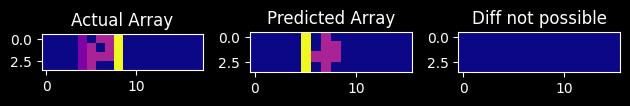

Training:   5%|▌         | 5/100 [25:56<8:06:14, 307.10s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Error in OpenAI API call: 1 validation error for Solution
explanation
  Field required [type=missing, input_value={'Answer': '[[0, 0, 0, 0,...cross the output grid."}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
Iteration: 1 - Consistency Validation
Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: de85f76f-b1b7-47aa-819f-9f0f5e56d5c2
Delete of nonexisting embedding ID: 951bec59-5af3-43d4-9ae0-adb98d671c7e
Delete of nonexisting embedding ID: a4c5770b-3656-401f-943c-b4c9a4dbbdde
Delete of nonexisting embedding ID: 14a60bb9-38e8-4614-9d29-689aad6820d6
Delete of nonexisting embedding ID: 770d56cd-b394-4b41-a0ba-dd8483b7ab0a
Delete of nonexisting embedding ID: dc67d3a6-7289-4c5d-9887-3b904ab77f26
Delete of nonexisting embedding ID: fe87202f-bcb2-440f-9da3-e3d887704f3a
Delete of nonexisting embedding ID: 33d09e53-e7a4-43a4-acea-4b5eaddbd26f
Delete of nonexisting embedding ID: 687e1674-e181-4db8-a4ca-2cdc0167248c
Delete of nonexisting embedding ID: 688b028e-cb6e-46b1-b1c2-6cb364ad9fb7
Delete of nonexisting embedding ID: b4cef60b-772b-4dad-9ddd-ba6c94ed79b0
Delete of nonexisting embedding ID: ca219350-8b6f-439f-ab40-e622e9eaaa32
Delete of nonexisting embedding ID: 47e79fd6-f389-4461-8652-749f384e4efa
Delete of nonexisting embedding ID: de85f76f-b1b7-4

Pruned 15 old entries and added 1 new entries.

Learned Knowledge Update:
['Understanding of clustering principles and their significance in grid '
 'transformations, emphasizing that visually significant integers must be '
 'clustered appropriately to ensure coherent outputs.',
 "Knowledge about symmetry's relevance in maintaining visual integrity during "
 'transformations, highlighting that output grids should mirror key patterns '
 'from the input grids.',
 'Recognition of the impact of significant integers in the input grids on '
 'their arrangement in output grids, which informs transformation logic and '
 'enhances predictability.',
 'Importance of dimensional homogeneity, ensuring that output grids maintain '
 'the same dimensions as input grids unless adjustments are necessary for '
 'clarity or improvement.']
DTW Score: 33.2264954516723


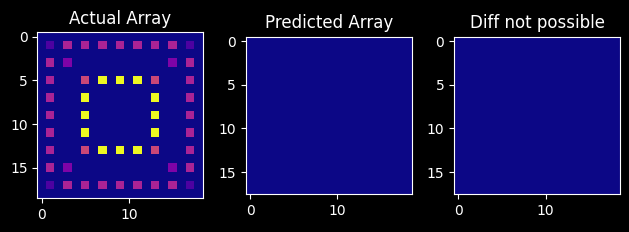

Training:   6%|▌         | 6/100 [30:10<7:33:10, 289.26s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: e4c71fd8-959f-4108-9d89-87d16005c0e2
Delete of nonexisting embedding ID: 8f786719-e69c-426d-839b-be033d8ac086
Delete of nonexisting embedding ID: 3bf7e423-cd88-473f-81f0-ca3674ad6ca4
Delete of nonexisting embedding ID: cf11fe3f-3b64-49ff-b7fd-f394ae8cef4b
Delete of nonexisting embedding ID: c06b5e04-1f99-427b-afb0-7505dc66e8b2
Delete of nonexisting embedding ID: 8d933442-5d29-4583-b059-af77d6c20d7b
Delete of nonexisting embedding ID: 47fbbc34-735a-4982-83e6-0bd6ceb3c603
Delete of nonexisting embedding ID: 86e68d30-f738-4bd6-966f-ac3cc2a1d2c0
Delete of nonexisting embedding ID: a7a26796-e5f4-46e8-bf78-48ac301f9caf
Delete of nonexisting embedding ID: b4179d2a-a7b0-4957-9ae6-9f069d9f11fb
Delete of nonexisting embedding ID: 645ea764-08c3-4b23-aae7-0ba66a7c0869
Delete of nonexisting embedding ID: cb4c8eeb-6bfd-4d31-921c-eecef8ba5ae0
Delete of nonexisting embedding ID: d4d067ea-dfe5-463e-9c21-9b279230310e
Delete of nonexisting embedding ID: efa4de15-ebd5-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Dimensional Consistency and Integrity: Maintain consistent dimensions in '
 'output grids to avoid confusion and enhance understanding of spatial '
 'relationships in transformations. Relevant in cases where clear visual '
 'comparisons are needed across grid transformations.',
 'Integer Clustering: Group similar integers together in output grids to '
 'improve readability and reflect the relationships and patterns found in '
 'input grids. Useful in enhancing intelligibility during grid '
 'transformations.',
 'Transformative Feedback Utilization: Use feedback from iterative trials to '
 'refine transformation methods and improve accuracy in subsequent grids. '
 'Essential for iterative improvement practices in grid transformation tasks.',
 'Spatial Relationship Mapping: Analyze the spatial arrangement of integers in '
 'input grids and replicate these relationships in the outputs to ensure '
 'integrity and c

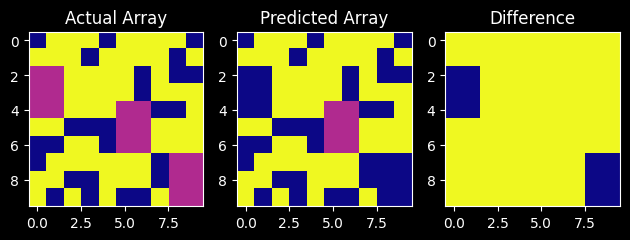

Training:   7%|▋         | 7/100 [35:12<7:34:45, 293.39s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: f9fc8cc4-9568-4482-8ccd-8787b960a7ce
Delete of nonexisting embedding ID: 17f0e210-118c-4a77-9ecf-00ad3c207bd7
Delete of nonexisting embedding ID: 6a5e0988-d55b-4776-8da8-abc27249480e
Delete of nonexisting embedding ID: 98081f7a-95b5-42f0-adfa-21f91b6fcca5
Delete of nonexisting embedding ID: dfa8d235-7a03-46e2-be95-7bec230d656d
Delete of nonexisting embedding ID: 76fff97b-bfc9-4481-a5c7-5e7bb25a9aec
Delete of nonexisting embedding ID: 6a1f2301-3ac5-4512-a1f7-8424991b62d0
Delete of nonexisting embedding ID: cdf0fca6-ffa2-458e-84b1-f6c81bb2b9f9
Delete of nonexisting embedding ID: 84096967-63d1-4c6b-81b4-6dd562f88993
Delete of nonexisting embedding ID: 82968af5-c8ce-4fc8-80bf-0863b8ce7cbc
Delete of nonexisting embedding ID: 7a1e6845-96ed-44d1-a400-55bdfb0a323b
Delete of nonexisting embedding ID: 23a7123a-9650-433f-80a0-2cfec945ab63
Delete of nonexisting embedding ID: c21fdc49-52f9-44b0-ae26-c6b71ac2fde8
Delete of nonexisting embedding ID: 7006bd8f-1870-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Ensure dimensional consistency in grid transformations; maintaining the same '
 'height and width as the input grid is crucial for preserving spatial '
 'relationships.',
 'Apply effective clustering techniques in output grids; group similar '
 'integers based on proximity to create visually coherent and logically '
 'structured results.',
 'Utilize learned transformation rules, particularly emphasizing significant '
 "integers such as '1', '2', '3', and '4' to maintain symmetry and clarity in "
 'output grids.',
 'Implement iterative feedback loops; analyze results after each '
 'transformation trial to refine strategies and improve the accuracy of '
 'subsequent outputs.',
 'Develop transformation rules based on pattern identification within input '
 'grids; consider spatial relationships to guide integer placement in output '
 'matrices.',
 'Highlight integer significance and relationships in output grids; '

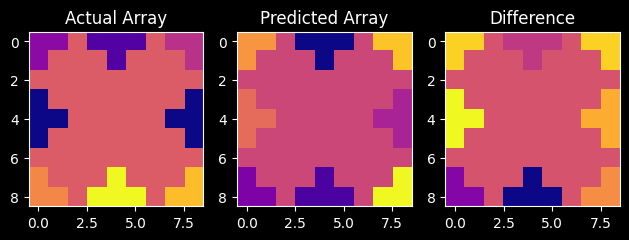

Training:   8%|▊         | 8/100 [40:47<7:50:00, 306.52s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Iteration: 3 - Pattern Extraction
Iteration: 3 - Transformation Analysis
Iteration: 3 - Logical Inference
Iteration: 3 - Solution Synthesis
Iteration: 3 - Consistency Validation
Iteration: 4 - Pattern Extraction
Iteration: 4 - Transformation Analysis
Iteration: 4 - Logical Inference
Error in OpenAI API call: 28 validation errors for ListLogicalRule
logical_rules.0.premise
  Field required [type=missing, input_value={'premise=': "If an integ...eir relative position."}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
logical_rules.0.conclusion
  Field required [type=missing, input_value={'premi

Delete of nonexisting embedding ID: 94db6574-cf2f-4d38-8c10-85dc0179f5ac
Delete of nonexisting embedding ID: 1a014d9d-5e7c-4882-b7fc-b82dc7bcb115
Delete of nonexisting embedding ID: e5620db7-3d60-4782-9d5e-5327c781b6c5
Delete of nonexisting embedding ID: 81c17478-3ffd-4f3b-81cf-b16d8c7039aa
Delete of nonexisting embedding ID: 4592c83a-6acf-434e-bf3e-90e7aedb8966
Delete of nonexisting embedding ID: 2047f5d6-1bd2-4611-9989-83e380803a31
Delete of nonexisting embedding ID: 9b4050ba-686c-40e6-9b14-58de1e6f1a58
Delete of nonexisting embedding ID: fecca140-8c15-4516-b6f6-13630f92220c
Delete of nonexisting embedding ID: 0f908366-11e3-4b3d-80ff-5eff88878e2e
Delete of nonexisting embedding ID: 0ce8f255-de23-48c5-bfb9-6d660c2b226f
Delete of nonexisting embedding ID: 889457f1-0354-4431-a07b-c05ef5f5e039
Delete of nonexisting embedding ID: 35fe33a3-2d64-4d20-a9a2-8158817bf562
Delete of nonexisting embedding ID: 668ed2e1-d96a-4bbb-b5ed-af239a7581e2
Delete of nonexisting embedding ID: fed33f8a-3498-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Concept: The transformation process for grid outputs relies heavily on the '
 'recognition of spatial relationships between integers in input grids.',
 'Idea: Employ iterative trial methods that allow for continuous refinement of '
 'grid transformations based on prior outputs and feedback.',
 'Principle: Dimensional integrity must be maintained across all '
 'transformations, ensuring output grids match the height and width of input '
 'grids to preserve their structure.',
 'Rule: Clustering principles should dictate the placement of integers in '
 "output grids, aiming to position integers like '2's directly beneath "
 "relevant '4's as observed in patterns from previous examples.",
 'Principle: Feedback loops are essential in the transformation process; '
 'regularly analyzing output from previous iterations informs adjustments '
 'needed in subsequent trials.',
 'Rule: When constructing output grids, ensure

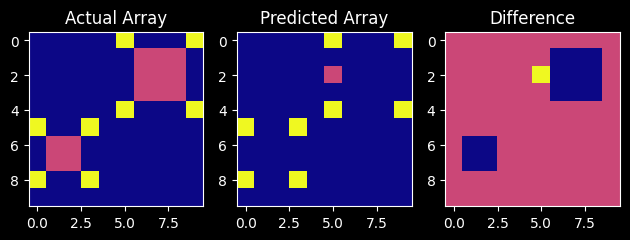

Training:   9%|▉         | 9/100 [49:35<9:30:00, 375.83s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Iteration: 3 - Pattern Extraction
Iteration: 3 - Transformation Analysis
Iteration: 3 - Logical Inference
Iteration: 3 - Solution Synthesis
Iteration: 3 - Consistency Validation
Iteration: 4 - Pattern Extraction
Iteration: 4 - Transformation Analysis
Iteration: 4 - Logical Inference
Iteration: 4 - Solution Synthesis
Iteration: 4 - Consistency Validation
Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: f22a5fed-0a78-4f23-93ca-1029f12db774
Delete of nonexisting embedding ID: c8a2c8ee-a134-488a-be88-c81b16be3379
Delete of nonexisting embedding ID: a093d05f-054e-4e7f-86b9-6d0ee3b0bdad
Delete of nonexisting embedding ID: ade9c9fc-d9b4-4735-9c3c-cc0eb38309f3
Delete of nonexisting embedding ID: cfeb07a2-7c6b-42d9-aea2-7b7c3112dea4
Delete of nonexisting embedding ID: fa5e2dd2-5ba9-4877-88d1-0502c5d327d2
Delete of nonexisting embedding ID: 8b85977c-a4ae-4092-9014-a0282914cc6a
Delete of nonexisting embedding ID: 3a336e87-5c9c-4212-a8c7-e4b3a9073e41
Delete of nonexisting embedding ID: 41c5783c-2d45-4878-9ac6-662519e58fd1
Delete of nonexisting embedding ID: 8b161d57-4b3f-41bb-9f4d-1bdb96a086c4
Delete of nonexisting embedding ID: 544728a2-f661-4fc8-9df7-bcf74c32d658
Delete of nonexisting embedding ID: e3c41a52-927e-47a4-993b-1a3e37dcd193
Delete of nonexisting embedding ID: 9c5965e5-176c-488b-9852-6b8f0970dc2a
Delete of nonexisting embedding ID: 2db373c9-a0ee-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Enhancing understanding of integer clustering principles is crucial, '
 'particularly how integers should be positioned in relation to each other '
 "based on established patterns observed in previous examples; e.g., '4's "
 "should significantly influence placements of '2's or '5's.",
 'It is essential to ensure that all transformation processes strictly adhere '
 'to logical rules that define visual representation and integer '
 'relationships, preventing inconsistencies in output grids; e.g., properly '
 'clustering similar integers based on their relationships.',
 'Implementing robust feedback loops is necessary to effectively incorporate '
 'insights from prior trials, adjusting the approach accordingly to strengthen '
 'transformations in future attempts; e.g., revise integer positions based on '
 'success or failure of previous outputs to improve accuracy of '
 'transformations.',
 'The importance of mai

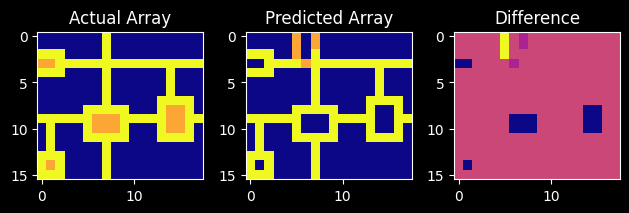

Training:  10%|█         | 10/100 [58:34<10:39:19, 426.22s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Iteration: 3 - Pattern Extraction
Iteration: 3 - Transformation Analysis
Iteration: 3 - Logical Inference
Iteration: 3 - Solution Synthesis
Iteration: 3 - Consistency Validation
Iteration: 4 - Pattern Extraction
Iteration: 4 - Transformation Analysis
Iteration: 4 - Logical Inference
Iteration: 4 - Solution Synthesis
Iteration: 4 - Consistency Validation
Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 383df2eb-a347-40c5-bcd9-3ea16e6dea07
Delete of nonexisting embedding ID: 19841302-76ab-4c6b-818c-fdd1c3971e6c
Delete of nonexisting embedding ID: 01791230-7d27-4af2-9c29-7914c8e41506
Delete of nonexisting embedding ID: bb5e32e4-37aa-4474-bf14-309d9ec4f7f6
Delete of nonexisting embedding ID: c71fa958-3a8a-4595-b5d8-7c2ad5a0da35
Delete of nonexisting embedding ID: 2115a1b0-3b9b-4e10-957e-4c7d2f51ef2f
Delete of nonexisting embedding ID: 6b4bc6e1-d4a5-4395-a51e-b49565463a66
Delete of nonexisting embedding ID: 6cfa95cc-e084-4c0a-8fc6-b216fef4f0cb
Delete of nonexisting embedding ID: 5cf8b5bb-d2b2-42aa-804b-cc881eb96914
Delete of nonexisting embedding ID: 07ad8579-5a08-46e4-b0a5-7416d6928e4c
Delete of nonexisting embedding ID: a1cafe10-4790-433f-ae80-59edcf03c045
Delete of nonexisting embedding ID: 79114602-f279-4870-9023-f5270bbce8f7
Delete of nonexisting embedding ID: 383df2eb-a347-40c5-bcd9-3ea16e6dea07
Delete of nonexisting embedding ID: 19841302-76ab-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Concept: Integer clustering strategies are essential for constructing output '
 'grids, ensuring logically coherent arrangements based on proximity to other '
 'integers.',
 'Idea: Utilize dimensional integrity by always maintaining the same height '
 'and width in the output grid as in the input grid to avoid any spatial '
 'misalignment.',
 'Principle: The relationships between integers should be preserved across '
 'transformations to ensure coherent and visually logical output grids. This '
 'includes understanding vertical and horizontal movements within the grid.',
 'Rule: Incorporate feedback from previous transformation responses to improve '
 'accuracy in future outputs, forming a continuous learning loop that refines '
 'integer placements.',
 'Concept: Visual representation consistency is crucial; a systematic approach '
 'to color-coding integers aids in quickly identifying patterns and '
 'relation

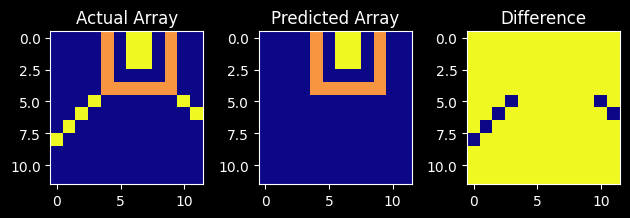

Training:  11%|█         | 11/100 [1:05:29<10:26:58, 422.68s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Iteration: 3 - Pattern Extraction
Iteration: 3 - Transformation Analysis
Iteration: 3 - Logical Inference
Iteration: 3 - Solution Synthesis
Error in OpenAI API call: 1 validation error for Solution
explanation
  Field required [type=missing, input_value={'Answer': '[[0, 0, 4, 0,...ion of the input data."}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
Error in OpenAI API call: 1 validation error for Solution
explanation
  Field required [type=missing, input_value={'Answer': '[[4, 4, 4, 0,...from the input matrix."}, input_type=dict]
    For further information visit https://errors.pydantic.

Delete of nonexisting embedding ID: f0308942-ac0b-44a9-abba-9830df16f6f3
Delete of nonexisting embedding ID: cc343503-2179-4147-b68e-2457f6a1a556
Delete of nonexisting embedding ID: 1282891d-4030-48e4-95fd-4d52a7fa9079
Delete of nonexisting embedding ID: a114d1a5-b91d-4ded-92af-ebe5718f630b
Delete of nonexisting embedding ID: 30676851-c52b-4842-8851-007ce3104ffa
Delete of nonexisting embedding ID: c81c00fd-4622-460a-8bfe-d5a80ecf16b2
Delete of nonexisting embedding ID: c04270f4-a2f5-4143-97a7-570e03442cee
Delete of nonexisting embedding ID: 24e11aa9-bd67-4a73-828c-1cb73ca53479
Delete of nonexisting embedding ID: 412e2eae-bce4-450a-8b73-ed8ead9fd86e
Delete of nonexisting embedding ID: c9cc721e-43f9-4284-9b54-95eedb4ec7f0
Delete of nonexisting embedding ID: 426c2bcf-9855-450d-8a4c-e6ef813334aa
Delete of nonexisting embedding ID: ddf9f12d-8ff8-460f-8263-6c19d6e59509
Delete of nonexisting embedding ID: 5b0df98c-dec8-4b0a-a68c-30983dc2100d
Delete of nonexisting embedding ID: f0308942-ac0b-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Dimensional Integrity Preservation: Always maintain the same height and '
 'width for input and output grids to ensure spatial alignment and logical '
 'continuity in transformations. This assists in accurately mirroring integer '
 'relationships from inputs to outputs. Applicability: Any task involving grid '
 'transformations where consistency in dimensions is critical.',
 'Integer Relationship and Clustering: Utilize established clustering patterns '
 'of similar integers. Organizing integers based on proximity and previous '
 'relationships aids in improving visual representation and helps in '
 'understanding transformation logic. Applicability: Effective in all grid '
 'tasks, particularly where integer relationships directly impact '
 'interpretations.',
 'Feedback Loop for Transformation Improvement: Learn from past mistakes by '
 'analyzing previous outputs. Adjust subsequent transformations based on '

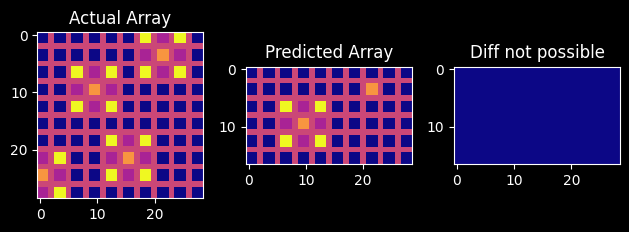

Training:  12%|█▏        | 12/100 [1:24:09<15:31:08, 634.87s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Iteration: 1 - Logical Inference
Iteration: 1 - Solution Synthesis
Iteration: 1 - Consistency Validation
Iteration: 2 - Pattern Extraction
Iteration: 2 - Transformation Analysis
Iteration: 2 - Logical Inference
Iteration: 2 - Solution Synthesis
Iteration: 2 - Consistency Validation
Iteration: 3 - Pattern Extraction
Iteration: 3 - Transformation Analysis
Iteration: 3 - Logical Inference
Iteration: 3 - Solution Synthesis
Iteration: 3 - Consistency Validation
Iteration: 4 - Pattern Extraction
Iteration: 4 - Transformation Analysis
Iteration: 4 - Logical Inference
Iteration: 4 - Solution Synthesis
Iteration: 4 - Consistency Validation
Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 086f24de-a88f-4aba-80d8-e1d85a04ac2f
Delete of nonexisting embedding ID: 577178e9-cd57-4537-a987-725d623a51e4
Delete of nonexisting embedding ID: de5e5de1-b9b0-40d6-b450-512e1ef0fd9a
Delete of nonexisting embedding ID: fff62efa-ffa5-4d9e-ac30-45727b4f657a
Delete of nonexisting embedding ID: b29caa66-74d4-411a-93ab-82b1ec2a5bc4
Delete of nonexisting embedding ID: d55a4a7b-ed30-4593-862b-5c16bac2ec89
Delete of nonexisting embedding ID: 9df92933-4a8b-4146-8a55-9c9a946bb548
Delete of nonexisting embedding ID: 67ea628e-f334-43bd-b0ec-9acfaad66d0e
Delete of nonexisting embedding ID: 043d16e2-7cec-4404-b963-2d13f053359c
Delete of nonexisting embedding ID: fa8395ed-28d2-4549-b275-d6f0976b81cb
Delete of nonexisting embedding ID: 9d8fcb0c-06e1-4b10-8afa-6b1906bb69d5
Delete of nonexisting embedding ID: a8ec90eb-988b-406a-a0f5-0cef75fedba3
Delete of nonexisting embedding ID: c04c6706-e8f5-47dd-bd9d-53d056e9ae49
Delete of nonexisting embedding ID: 086f24de-a88f-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding of integer clustering strategies is essential for maintaining '
 'visual coherence between input and output grids, thereby improving clarity '
 'in representation.',
 'Iterative learning from previous transformations significantly enhances the '
 'ability to apply learned patterns and rules effectively to new grid tasks, '
 'thereby offering a framework for accurate predictions.',
 'Consistency in transformation dimensions is key; it helps ensure that '
 'spatial relationships and integer placements are preserved effectively, '
 "enhancing the output grid's logical structure.",
 'Focus on preserving integer relationships across transformations, '
 'reinforcing the need for maintaining clustering behaviors that are coherent '
 'with prior outputs, thus aiding in clearer visual interpretation of outputs.',
 'The necessity of a systematic approach to recognizing and arranging integers '
 'based on es

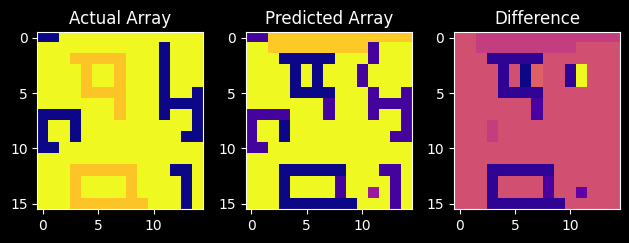

Training:  13%|█▎        | 13/100 [1:31:38<13:58:49, 578.50s/it]

Iteration: 1 - Pattern Extraction
Iteration: 1 - Transformation Analysis
Error in OpenAI API call: 1 validation error for ListTransformation
  Invalid JSON: EOF while parsing a string at line 1 column 2121 [type=json_invalid, input_value='{"transformations":[{"in..., 1, 1, 1, 1, 1, 1, 1, ', input_type=str]
    For further information visit https://errors.pydantic.dev/2.7/v/json_invalid
Error in OpenAI API call: 1 validation error for ListTransformation
  Invalid JSON: EOF while parsing a string at line 1 column 2127 [type=json_invalid, input_value='{"transformations":[{"in..., 1, 1, 1, 1, 1, 1, 1, ', input_type=str]
    For further information visit https://errors.pydantic.dev/2.7/v/json_invalid
Error in OpenAI API call: 1 validation error for ListTransformation
  Invalid JSON: EOF while parsing a string at line 1 column 2232 [type=json_invalid, input_value='{"transformations":[{"in...1, 1, 1, 1, 1, 1, 1, 1,', input_type=str]
    For further information visit https://errors.pydantic.de

Training:  13%|█▎        | 13/100 [1:41:07<11:16:44, 466.72s/it]


ValidationError: 1 validation error for ListTransformation
  Invalid JSON: EOF while parsing a string at line 1 column 2232 [type=json_invalid, input_value='{"transformations":[{"in...1, 1, 1, 1, 1, 1, 1, 1,', input_type=str]
    For further information visit https://errors.pydantic.dev/2.7/v/json_invalid

In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import (logic_concept_reasoning_network,
                            pattern_based_logical_reasoning_network)

reasoning_iterations=4
reasoning_agent=lambda prompt,input: pattern_based_logical_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
# reasoning_agent=None
set_live_verbosity(0)

n = 100
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [ ]:
mlu.print_knowledge_base()